# Daily Challenge: NumPy, Pandas & Matplotlib Integration

## Data Import and Cleaning:

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.

In [19]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('global_power_plant_database.csv')

pd.set_option('display.max_columns', None)
df.info()
df.head(10)

C:\Users\Acer\AppData\Local\Temp\ipykernel_8184\3788612527.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.00,31.6700,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.00,31.6230,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.77,54.42,42.71,59.72,46.12,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,35.9416,68.7100,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.99,21.19,18.40,25.34,19.74,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
8,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,GEODB0040535,22.00,34.5865,69.7757,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009799,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.23,82.87,69.15,93.83,80.00,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
9,ALB,Albania,Bistrica 1,WRI1002169,27.00,39.9116,20.1047,Hydro,NaN,NaN,NaN,1965.0,NaN,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,1021225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.17,75.26,79.50,105.45,88.45,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
# the number of missing values in each column
df.isna().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [6]:
# checking for duplicate strings
df.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px">
 
**This dataset contains the following data:**
  
- This dataset is a comprehensive, global, open source database of power plants.
- It contains 36 columns and 34936 rows.
- There are no duplicates in the dataset.
- All values in the corresponding types except for the commissioning_year and year_of_capacity_data columns - they are in float format, not date format.
- There are missing values in 23 columns.

In [7]:
# Convert 'commissioning_year' and 'year_of_capacity_data' to datetime
df['commissioning_year'] = pd.to_datetime(df['commissioning_year'], format='%Y', errors='coerce')
df['year_of_capacity_data'] = pd.to_datetime(df['year_of_capacity_data'], format='%Y', errors='coerce')

## Exploratory Data Analysis:

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

In [11]:
# Display key statistics for numerical columns
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


<div style="border:solid green 2px; padding: 20px">
    In all numerical columns there are a lot of outliers, the minimum and maximum values are very far from each other, the median and the mean are also very different.

In [14]:
# Count the number of power plants by country
print("Distribution of power plants by country:")
df['country'].value_counts().head(50)

Distribution of power plants by country:


USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
IND    1589
DEU    1309
CAN    1159
ESP     829
RUS     545
JPN     522
AUS     486
PRT     469
CZE     462
ITA     396
CHL     315
NOR     306
MEX     277
VNM     236
ARG     236
THA     196
POL     189
FIN     185
IDN     178
SWE     168
CHE     168
TUR     163
KOR     132
PHL     123
IRN     107
ZAF     104
AUT     103
GRC      90
SAU      90
GTM      76
URY      73
NLD      71
BEL      69
ROU      68
UKR      64
PAK      62
EGY      62
DZA      59
IRL      59
ISR      59
BGD      57
MYS      55
LKA      48
DNK      47
MAR      45
Name: country, dtype: int64

In [16]:
# Count the number of power plants by fuel type
print("Distribution of power plants by fuel type:")
df['primary_fuel'].value_counts()

Distribution of power plants by fuel type:


Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: int64

<div style="border:solid green 2px; padding: 20px">
    Most power plants are located in the following countries: USA, China, UK, Brazil, France, India, Germany, Canada, Spain, Russia.
    The most common fuel types are Solar, Hydro, and Wind.

## Statistical Analysis:

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

In [20]:
fuel_types = df['primary_fuel'].unique()
power_outputs = [df[df['primary_fuel'] == fuel]['generation_gwh_2019'].dropna() for fuel in fuel_types]

mean_power = [np.mean(power) for power in power_outputs]
median_power = [np.median(power) for power in power_outputs]
std_dev_power = [np.std(power) for power in power_outputs]

statistics_df = pd.DataFrame({
    'Fuel type': fuel_types,
    'Mean power output': mean_power,
    'Median power output': median_power,
    'Standard deviation': std_dev_power
})

print("Descriptive statistics for power output by fuel type:")
statistics_df

Descriptive statistics for power output by fuel type:


C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Fuel type,Mean power output,Median power output,Standard deviation
0,Hydro,198.870976,25.340000,870.591940
1,Solar,21.979277,4.291500,69.453232
2,Gas,890.247807,69.872000,1905.592365
3,Other,92.095533,50.700000,121.978038
4,Oil,26.993427,0.079000,387.133067
5,Wind,260.224371,153.820000,302.789883
6,Nuclear,13916.302621,14444.866500,6033.825834
7,Coal,3325.496127,1869.964502,3649.119873
8,Waste,84.520027,33.589095,122.808498
9,Biomass,169.107768,24.349500,210.372870


<div style="border:solid green 2px; padding: 20px">
    The selected indicators are very different for different fuels

In [22]:
fuel_type1 = 'Hydro'
fuel_type2 = 'Solar'
power_output1 = df[df['primary_fuel'] == fuel_type1]['generation_gwh_2019'].dropna()
power_output2 = df[df['primary_fuel'] == fuel_type2]['generation_gwh_2019'].dropna()

# Perform t-test
statistic, p_value = ttest_ind(power_output1, power_output2, equal_var=False)

print(f"T-test for Mean Power Output between {fuel_type1} and {fuel_type2}:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis: Mean power output differs significantly between {fuel_type1} and {fuel_type2}.")
else:
    print(f"\nFail to reject the null hypothesis: No significant difference in mean power output between {fuel_type1} and {fuel_type2}.")

T-test for Mean Power Output between Hydro and Solar:
Test Statistic: 7.640652413411216
P-value: 3.944529553400087e-14.round(2)

Reject the null hypothesis: Mean power output differs significantly between Hydro and Solar.


## Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

<Figure size 1300x700 with 0 Axes>

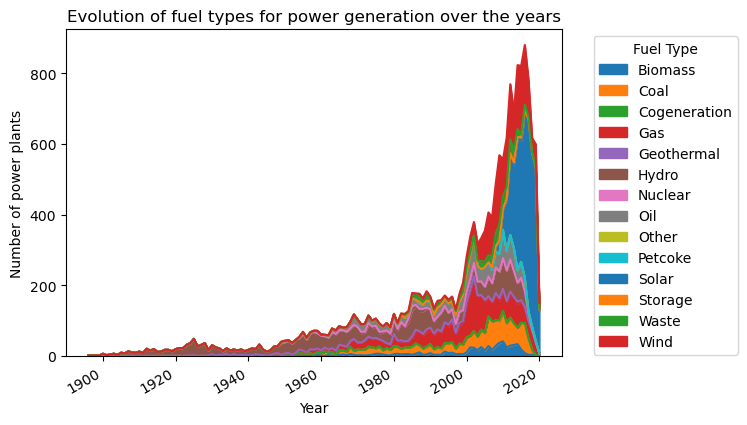

In [28]:
time_series_data = df[['commissioning_year', 'primary_fuel']]

# Drop rows with missing values in the selected columns
time_series_data = time_series_data.dropna(subset=['commissioning_year', 'primary_fuel'])

# Group by year and fuel type, count occurrences
fuel_type_counts = time_series_data.groupby(['commissioning_year', 'primary_fuel']).size().unstack().fillna(0)

plt.figure(figsize=(13, 7))
fuel_type_counts.plot(kind='area', stacked=True)
plt.title('Evolution of fuel types for power generation over the years')
plt.xlabel('Year')
plt.ylabel('Number of power plants')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

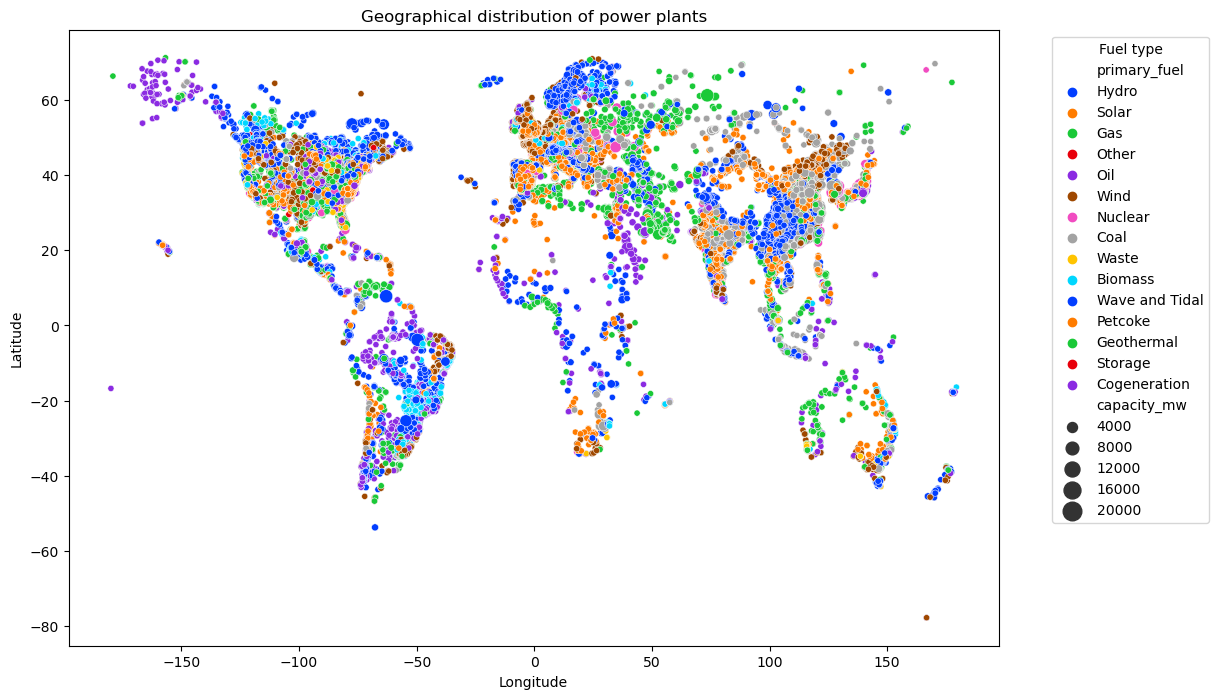

In [30]:
# Scatter plot for geographical distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=df, palette='bright', size='capacity_mw', sizes=(20, 200))
plt.title('Geographical distribution of power plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

In [31]:
A = df[['capacity_mw', 'latitude', 'longitude']].values

# create correlation matrix
correlation_matrix = np.dot(A.T, A)
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


array([[ 9.30770239e+09,  1.82165318e+08,  1.63425979e+08],
       [ 1.82165318e+08,  5.55280927e+07, -1.22328221e+07],
       [ 1.63425979e+08, -1.22328221e+07,  2.16460710e+08]])

In [35]:
query = {
    'fuel_type': ['Hydro', 'Solar', 'Gas'],
    'capacity_mw': [50, 10, 30],
    'latitude': [34.56, 31.67, 34.56],
    'longitude': [69.12, 65.79, 69.11]
}

data = pd.DataFrame(query)
print(data)

# Transpose
A_transposed = data.T
print("\nTransposed matrix:")
A_transposed

  fuel_type  capacity_mw  latitude  longitude
0     Hydro           50     34.56      69.12
1     Solar           10     31.67      65.79
2       Gas           30     34.56      69.11

Transposed matrix:


,0,1,2
fuel_type,Hydro,Solar,Gas
capacity_mw,50,10,30
latitude,34.56,31.67,34.56
longitude,69.12,65.79,69.11


Matrix operations can be applied to analyze relationships between different attributes in a real-world context. For example, scenario where we have a dataset of power plants with attributes such as fuel type, capacity, and geographic location (latitude and longitude). We can represent this dataset as a matrix and perform matrix operations to gain insights. 
Relevance of Eigenvectors and Eigenvalues:

Eigenvectors and eigenvalues become relevant when we want to understand the inherent characteristics or dominant directions in the data.

Covariance Matrix: Calculating the covariance matrix of the attributes (columns of 
A) provides information about how attributes vary together. Eigenvectors of the covariance matrix represent the principal components or directions of maximum variance.

PCA (Principal Component Analysis): PCA is a technique that uses eigenvectors and eigenvalues to transform the data into a new coordinate system, where the first few principal components capture the most variance in the data. This can be useful for dimensionality reduction and identifying the most influential features.

Impact on Attributes: Eigenvectors can help identify the contribution of each attribute to the principal components, providing insights into the relationships between different attributes.

In summary, matrix operations and eigendecomposition techniques are powerful tools for analyzing relationships in real-world datasets, providing a foundation for understanding data patterns and reducing dimensionality when needed.

## Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.


In [38]:
# Use NumPy for complex filtering
filtered_df = df[np.logical_and(df['capacity_mw'] > 80, df['primary_fuel'] != 'Coal')]
print("\nFiltered DataFrame:")
filtered_df.head(10)


Filtered DataFrame:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaT,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
10,ALB,Albania,Fierza,WRI1002170,500.0,42.2514,20.0431,Hydro,NaN,NaN,NaN,1978-01-01,NaN,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,1021231,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1976.01,1276.61,1503.72,1795.15,1648.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
11,ALB,Albania,Koman,WRI1002171,600.0,42.1033,19.8224,Hydro,NaN,NaN,NaN,1985-01-01,NaN,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,1021233,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2072.13,1618.73,1805.63,2434.84,1982.72,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
15,ALB,Albania,Vau i Dijes,WRI1002175,250.0,42.0137,19.6359,Hydro,NaN,NaN,NaN,1971-01-01,NaN,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,1021242,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,895.02,561.94,614.47,897.47,703.64,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
16,ALB,Albania,Vlora,WRI1002176,98.0,40.4874,19.4340,Other,NaN,NaN,NaN,NaT,NaN,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,1021244,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
19,DZA,Algeria,Ain Djasser,WRI1023776,520.0,35.8665,6.0262,Gas,Oil,NaN,NaN,NaT,SociÃ©te AlgÃ©rienne de Production de l\'Elect...,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,KTH,1069670,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2171.28,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
27,DZA,Algeria,Arbaa,WRI1023777,560.0,36.5988,3.1375,Gas,Oil,NaN,NaN,2010-01-01,Sonelgaz,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,GEODB,1069669,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2338.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
29,DZA,Algeria,Boufarik 1,WRI1023792,100.0,36.5914,2.9223,Gas,NaN,NaN,NaN,1980-01-01,NaN,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,GEODB,1029484,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417.55,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
30,DZA,Algeria,Boufarik 2,WRI1023793,450.0,36.5960,2.8780,Gas,NaN,NaN,NaN,2016-01-01,NaN,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,KTH,1029484,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1878.99,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
31,DZA,Algeria,Boutelilis,WRI1023781,450.0,35.5658,-0.9386,Gas,NaN,NaN,NaN,2016-01-01,NaN,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,GEODB,1099563,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1878.99,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


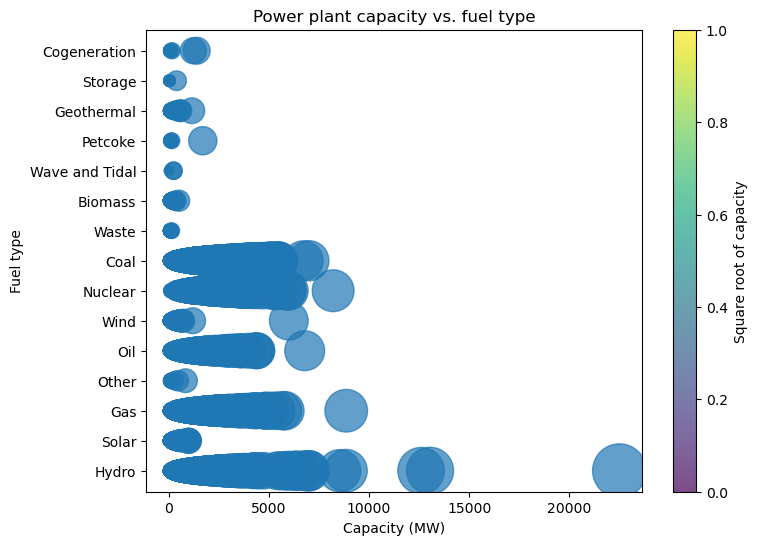

In [39]:
# Using NumPy to enhance data for visualization
df['sqrt_capacity'] = np.sqrt(df['capacity_mw'])

# Creating a scatter plot with bubble sizes
plt.figure(figsize=(8, 6))
plt.scatter(df['capacity_mw'], df['primary_fuel'], s=df['sqrt_capacity']*10, alpha=0.7, cmap='viridis')
plt.title('Power plant capacity vs. fuel type')
plt.xlabel('Capacity (MW)')
plt.ylabel('Fuel type')
plt.colorbar(label='Square root of capacity')
plt.show()

<div style="border:solid green 2px; padding: 20px">
In first example, NumPy's logical_and function is used for complex filtering based on capacity and fuel type.

Second example: enhancing data visualization in matplotlib with NumPy: creating Sophisticated Plots: NumPy can be used to generate data for creating more complex and dynamic plots in Matplotlib. Let's create a scatter plot with bubble sizes proportional to the square root of the capacity. In this example, NumPy is used to calculate the square root of the capacity, and the result is used to set bubble sizes in the scatter plot.

These examples showcase how NumPy can be seamlessly integrated with Pandas for complex data manipulation and with Matplotlib for creating more sophisticated and visually appealing plots. NumPy's array operations and mathematical functions provide additional power and flexibility in handling and analyzing data.